In [1]:
from datetime import datetime, timezone
from pathlib import Path

import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
from drama import constants as d_constants
from netCDF4 import Dataset
from scipy.interpolate import griddata
import stereoid.oceans.visualization.wave_spectra_plot as wp

In [2]:
LOG_FACTOR = 1e3
CBAR_TICKS = [1e-2, 1e-1, 1e0]
RADII_FREQ_TICKS_LOG = np.array([0.05, 0.1, 0.2, 0.3, 0.4])

In [3]:
ww3_path = Path(
    "/home/andreastheodosiou/Code/WSOA Scientific Workbench/Plotting/Ifremer/MARC_WW3-NORGAS-UG_20240101T00Z.nc"
)
mars_path = Path(
    "/home/andreastheodosiou/Code/WSOA Scientific Workbench/Plotting/Ifremer/MARC_L1-MARS2D-MANGA700_20240101T0000Z_MeteoMF.nc"
)
spec_path = Path(
    "/home/andreastheodosiou/Code/WSOA Scientific Workbench/Plotting/Ifremer/MARC_WW3-62163_20240101T00Z.nc"
)

In [4]:
ww3_ds = xr.open_dataset(ww3_path)
mars_ds = xr.open_dataset(mars_path)
spec_ds = xr.open_dataset(spec_path)

In [5]:
time = mars_ds.time.isel(time=0).values

In [6]:
u = ww3_ds.ucur.sel(time=time).where(ww3_ds.isel(time=0).hs > 0, drop=True).to_numpy()
v = ww3_ds.vcur.sel(time=time).where(ww3_ds.isel(time=0).hs > 0, drop=True).to_numpy()

In [7]:
lon_mars = mars_ds.longitude_u.to_numpy()
lat_mars = mars_ds.latitude_u.to_numpy()
max_lat = lat_mars.max()
min_lat = lat_mars.min()
min_lon = lon_mars.min()
max_lon = lon_mars.max()
lat_ww3 = (
    ww3_ds.sel(time=time).latitude.where(ww3_ds.sel(time=time).hs > 0, drop=True).to_numpy()
)
lon_ww3 = (
    ww3_ds.sel(time=time)
    .longitude.where(ww3_ds.sel(time=time).hs > 0, drop=True)
    .to_numpy()
)

In [8]:
u_ww3_grid = griddata((lon_ww3, lat_ww3), u, (lon_mars, lat_mars), method="linear")
v_ww3_grid = griddata((lon_ww3, lat_ww3), v, (lon_mars, lat_mars), method="linear")

In [9]:
u_mars = mars_ds.sel(time=time).U.to_numpy()
v_mars = mars_ds.sel(time=time).V.to_numpy()

In [10]:
cur_ww3 = np.sqrt(u_ww3_grid**2 + v_ww3_grid**2)
cur_mars = np.sqrt(u_mars**2 + v_mars**2)
cur_diff = np.abs(
    np.sqrt(u_ww3_grid**2 + v_ww3_grid**2) - np.sqrt(u_mars**2 + v_mars**2)
)

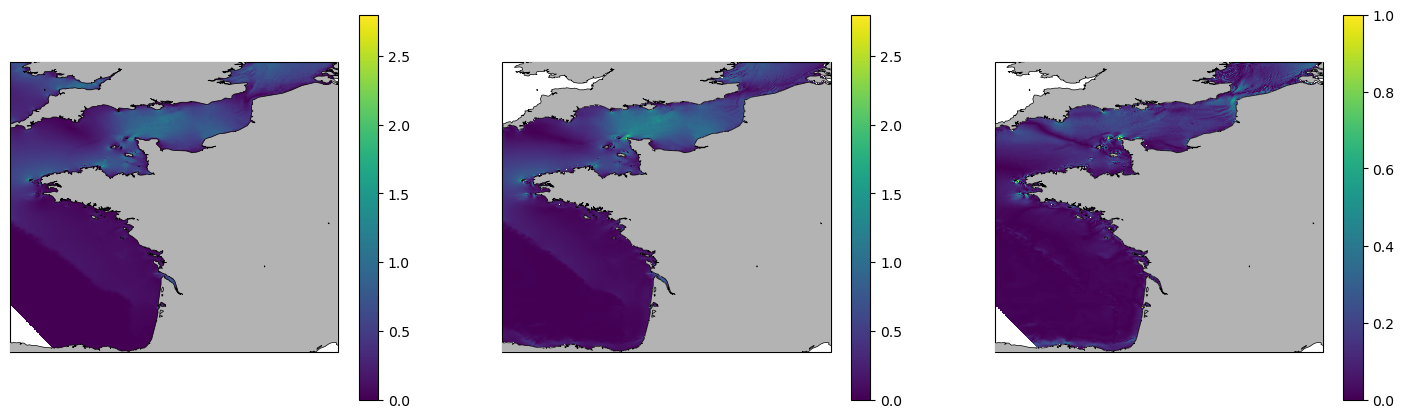

In [11]:
fig = plt.figure(figsize=(18, 5))
for i, (quantity, vmax) in enumerate(zip((cur_ww3, cur_mars, cur_diff), (2.8, 2.8, 1))):
    ax = fig.add_subplot(1, 3, i + 1, projection=ccrs.PlateCarree())
    ax.set_extent([min_lon, max_lon, min_lat, max_lat])
    ax.add_feature(
        cartopy.feature.GSHHSFeature("auto", levels=[1, 2]),
        edgecolor="black",
        facecolor=0.7 * np.array([1, 1, 1]),
        zorder=10,
        linewidth=0.5,
        rasterized=True,
    )
    cf = ax.pcolormesh(lon_mars, lat_mars, quantity, vmin=0, vmax=vmax)
    fig.colorbar(cf)

In [12]:
"latitude" not in spec_ds.coords

True

In [13]:
spec_ds = spec_ds.efth

(<Figure size 1100x1100 with 2 Axes>,
 <PolarAxes: >,
 <matplotlib.contour.QuadContourSet at 0x7fd1d2b2e270>)

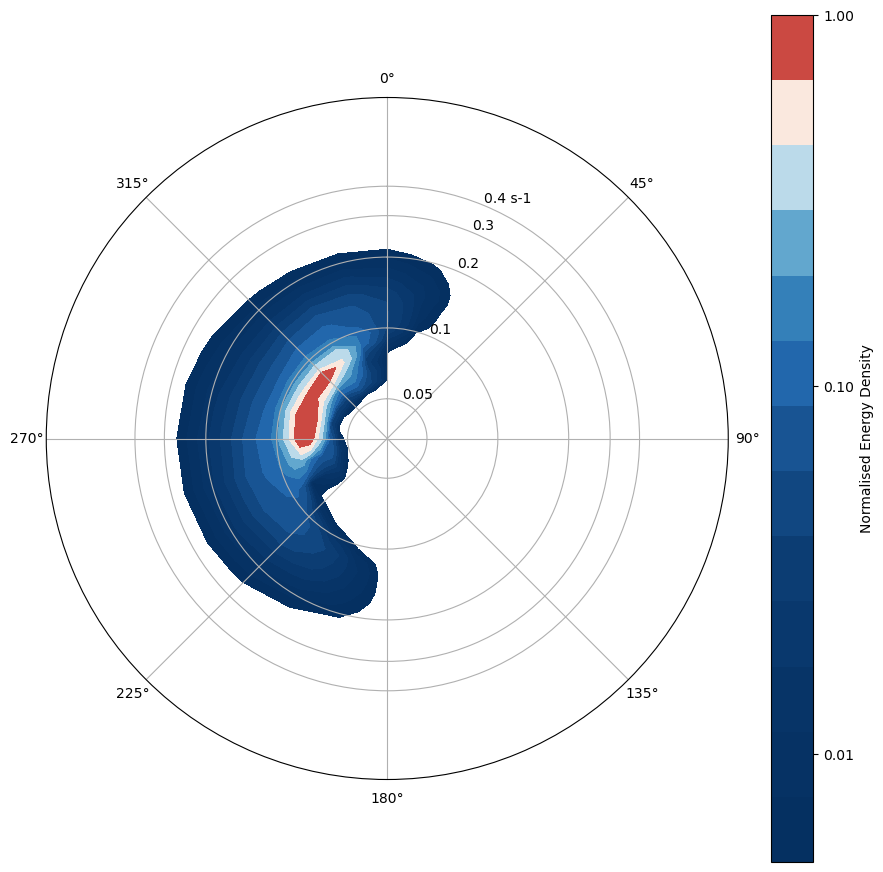

In [14]:
wp.polar_plot(spec_ds)

In [46]:
lat_mars[:, 0]

array([43.282734, 43.28913 , 43.295395, ..., 51.99347 , 51.999733,
       52.00613 ], dtype=float32)

In [47]:
spec_ds.expand_dims({"longitude": lon_mars[0], "latitude": lat_mars[:, 0]})

<xarray.DataArray 'efth' (longitude: 1087, latitude: 1386, time: 1, station: 1,
                          frequency: 36, direction: 24)>
array([[[[[[8.7034828e-13, 3.8196356e-13, 9.8323693e-12, ...,
            2.0189119e-12, 1.3885492e-12, 2.0013678e-12],
           [2.0925541e-09, 8.8418073e-09, 5.6200641e-08, ...,
            1.2669132e-09, 2.6916447e-09, 3.2482239e-09],
           [8.5098191e-07, 5.2466266e-06, 1.7732000e-05, ...,
            1.0216900e-06, 1.6794818e-06, 7.8068217e-07],
           ...,
           [1.2553409e-03, 1.2466466e-03, 1.2154606e-03, ...,
            9.1381825e-04, 1.1411938e-03, 1.2381142e-03],
           [7.7946787e-04, 7.7406934e-04, 7.5470528e-04, ...,
            5.6740909e-04, 7.0859143e-04, 7.6877140e-04],
           [4.8398817e-04, 4.8063614e-04, 4.6861256e-04, ...,
            3.5231639e-04, 4.3997954e-04, 4.7734653e-04]]]],



        [[[[8.7034828e-13, 3.8196356e-13, 9.8323693e-12, ...,
            2.0189119e-12, 1.3885492e-12, 2.0013678e-12],
           [2.0925541e-09, 8.8418073e-09, 5.6200641e-08, ...,
            1.2669132e-09, 2.6916447e-09, 3.2482239e-09],
...
            5.6740909e-04, 7.0859143e-04, 7.6877140e-04],
           [4.8398817e-04, 4.8063614e-04, 4.6861256e-04, ...,
            3.5231639e-04, 4.3997954e-04, 4.7734653e-04]]]],



        [[[[8.7034828e-13, 3.8196356e-13, 9.8323693e-12, ...,
            2.0189119e-12, 1.3885492e-12, 2.0013678e-12],
           [2.0925541e-09, 8.8418073e-09, 5.6200641e-08, ...,
            1.2669132e-09, 2.6916447e-09, 3.2482239e-09],
           [8.5098191e-07, 5.2466266e-06, 1.7732000e-05, ...,
            1.0216900e-06, 1.6794818e-06, 7.8068217e-07],
           ...,
           [1.2553409e-03, 1.2466466e-03, 1.2154606e-03, ...,
            9.1381825e-04, 1.1411938e-03, 1.2381142e-03],
           [7.7946787e-04, 7.7406934e-04, 7.5470528e-04, ...,
            5.6740909e-04, 7.0859143e-04, 7.6877140e-04],
           [4.8398817e-04, 4.8063614e-04, 4.6861256e-04, ...,
            3.5231639e-04, 4.3997954e-04, 4.7734653e-04]]]]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -5.721 -5.712 -5.703 ... 4.165 4.174 4.184
  * latitude   (latitude) float32 43.28 43.29 43.3 43.3 ... 51.99 52.0 52.01
  * direction  (direction) float32 90.0 75.0 60.0 45.0 ... 135.0 120.0 105.0
  * frequency  (frequency) float32 0.0339 0.03729 0.04102 ... 0.8661 0.9527
  * station    (station) float64 438.0
  * time       (time) datetime64[ns] 2024-01-01
Attributes:
    long_name:      sea surface wave directional variance spectral density
    standard_name:  sea_surface_wave_directional_variance_spectral_density
    globwave_name:  directional_variance_spectral_density
    units:          m2 s rad-1
    valid_min:      0.0
    valid_max:      1e+20
    content:        TXYZ
    associates:     time station frequency direction